In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN

data=pd.read_csv("diabetic_data.csv")

In [2]:
data.head(30)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
data.replace('?', np.nan, inplace=True) 
# replacing ? with nan

In [6]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Removing the columns with more than 20000 missing values and 'examide','citoglipton'are dropped because they have only one unique value

In [7]:
data.drop(columns=['encounter_id','admission_source_id','weight','max_glu_serum','A1Cresult','medical_specialty','payer_code','examide','citoglipton'],inplace=True)

In [8]:
data

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,1,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,3,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
numeric_data = data.select_dtypes(include=['int', 'float'])
data[numeric_data.columns] = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

In [10]:
#Convert categorical variables to numeric using label encoding
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in data.select_dtypes(include='object'):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [11]:
data

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157.0,2,0,0,6.0,25.0,1.0,41.0,0.0,1.0,...,0,1,1,0,0,0,0,1,0,2
1,55629189.0,2,0,1,1.0,1.0,3.0,59.0,0.0,18.0,...,0,3,1,0,0,0,0,0,1,1
2,86047875.0,0,0,2,1.0,1.0,2.0,11.0,5.0,13.0,...,0,1,1,0,0,0,0,1,1,2
3,82442376.0,2,1,3,1.0,1.0,2.0,44.0,1.0,16.0,...,0,3,1,0,0,0,0,0,1,2
4,42519267.0,2,1,4,1.0,1.0,1.0,51.0,0.0,8.0,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476.0,0,1,7,1.0,3.0,3.0,51.0,0.0,16.0,...,0,0,1,0,0,0,0,0,1,1
101762,74694222.0,0,0,8,1.0,4.0,5.0,33.0,3.0,18.0,...,0,2,1,0,0,0,0,1,1,2
101763,41088789.0,2,1,7,1.0,1.0,1.0,53.0,0.0,9.0,...,0,0,1,0,0,0,0,0,1,2
101764,31693671.0,2,0,8,2.0,3.0,10.0,45.0,2.0,21.0,...,0,3,1,0,0,0,0,0,1,2


In [13]:
categorical_indices = np.where(data.columns.isin(categorical_columns))[0]
categorical_indices=list(categorical_indices)
categorical_indices

[1,
 2,
 3,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

# Kprototype Model

In [15]:

# Specify the number of clusters (n_clusters)
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=1,verbose=2)

# Fit the model
clusters = kproto.fit_predict(data.values, categorical=categorical_indices)

# Print the results
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 29076, ncost: 1.7078727632915573e+19
Run: 1, iteration: 2/100, moves: 16496, ncost: 1.400355705413707e+19
Run: 1, iteration: 3/100, moves: 5810, ncost: 1.3533876622537052e+19
Run: 1, iteration: 4/100, moves: 2731, ncost: 1.3010025432576272e+19
Run: 1, iteration: 5/100, moves: 2072, ncost: 1.2494555765918767e+19
Run: 1, iteration: 6/100, moves: 386, ncost: 1.249116627968516e+19
Run: 1, iteration: 7/100, moves: 164, ncost: 1.2490686300920852e+19
Run: 1, iteration: 8/100, moves: 71, ncost: 1.2490602803887682e+19
Run: 1, iteration: 9/100, moves: 20, ncost: 1.2490597080085561e+19
Run: 1, iteration: 10/100, moves: 3, ncost: 1.2490596864253116e+19
Run: 1, iteration: 11/100, moves: 1, ncost: 1.2490596844498647e+19
Run: 1, iteration: 12/100, moves: 0, ncost: 1.2490596844498647e+19


array([3, 0, 2, ..., 0, 3, 1], dtype=uint16)

In [16]:
data['clusters']=clusters

In [17]:

# Separate the features and the cluster labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Initialize and fit PCA
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA on K-Prototype Data')

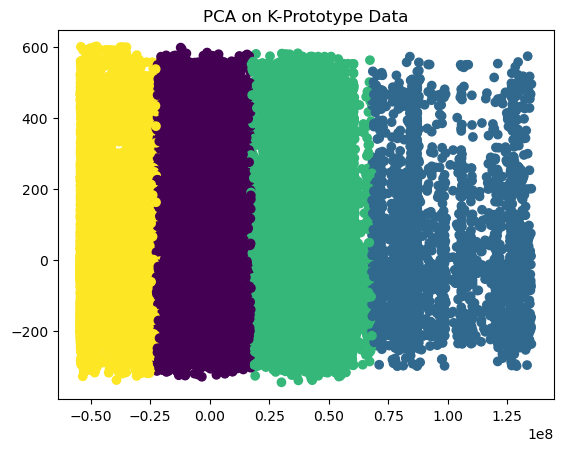

In [18]:

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA on K-Prototype Data')

In [19]:
 from sklearn.cluster import DBSCAN
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data)

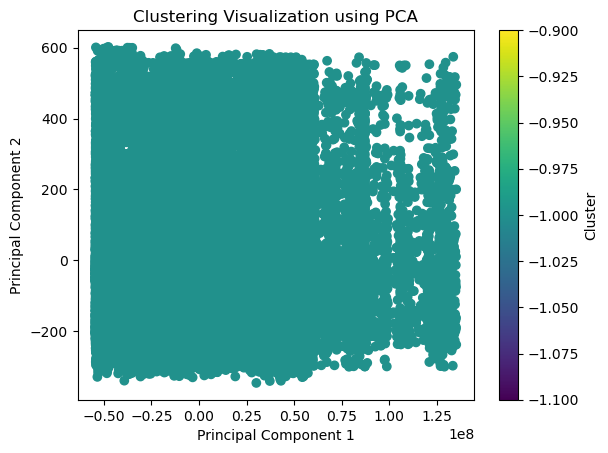

In [21]:

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization using PCA')
plt.colorbar(label='Cluster')
plt.show()

In [24]:
centroids = kproto.cluster_centroids_

In [25]:
labels = kproto.labels_

# Insights

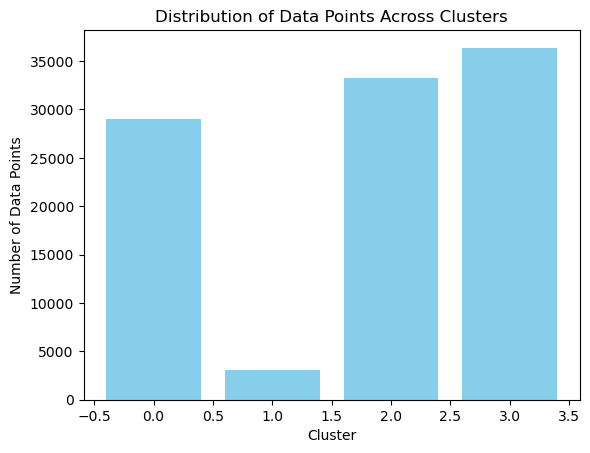

In [23]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Cluster' is the column with cluster assignments
cluster_counts = data['clusters'].value_counts()

# Create a bar plot
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()


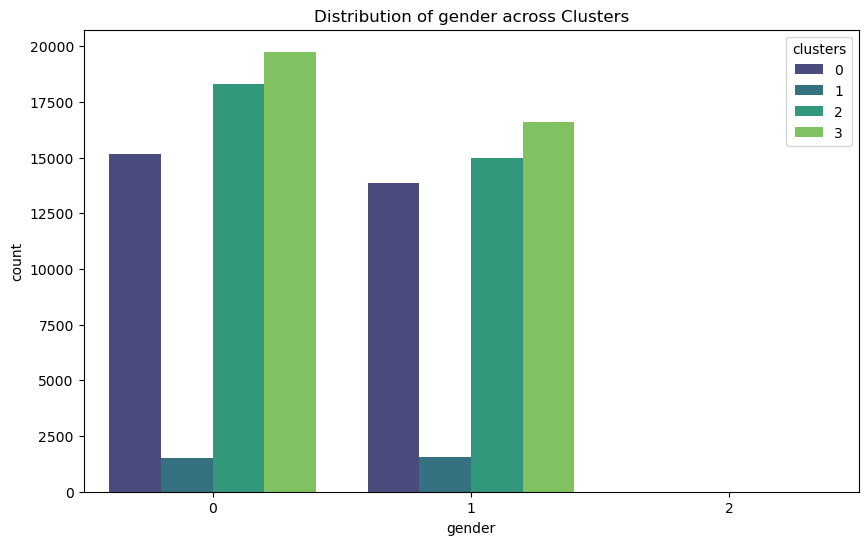

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over categorical features and create bar charts for each

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='clusters', data=data, palette='viridis')
plt.title(f'Distribution of gender across Clusters')
plt.show()


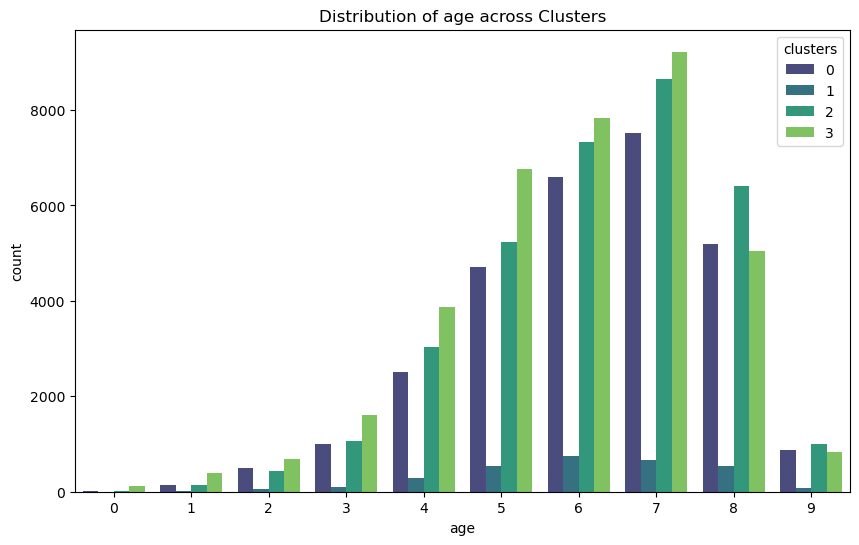

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='clusters', data=data, palette='viridis')
plt.title(f'Distribution of age across Clusters')
plt.show()